NAME: TAHMID IQBAL
ID: 21201701
DATASET:05



In [50]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
import pandas as pd

file_path = '/content/drive/My Drive/CSE422_Ass04/car_dataset.csv'

cardf = pd.read_csv(file_path)

cardf.head(10)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,NaN,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,NaN,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,NaN,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,NaN,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,NaN,48.7,1.0
5,Fiesta,2015,10500,Manual,35432,Petrol,NaN,47.9,1.6
6,Puma,2019,22500,Manual,2029,Petrol,NaN,50.4,1.0
7,Fiesta,2017,9000,Manual,13054,Petrol,NaN,54.3,1.2
8,Kuga,2019,25500,Automatic,6894,Diesel,NaN,42.2,2.0
9,Focus,2018,10000,Manual,48141,Petrol,145.0,61.4,1.0


In [52]:
print(f"Shape: {cardf.shape}, Columns: {(cardf.columns)}")


Shape: (17966, 9), Columns: Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')


In [53]:
cardf.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17957.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.312747,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.023480,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [54]:
cardf.isnull()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
17961,False,False,False,False,False,False,False,False,False
17962,False,False,False,False,False,False,False,False,False
17963,False,False,False,False,False,False,False,False,False
17964,False,False,False,False,False,False,False,False,False


In [57]:
print(f"nullvalues:\n {cardf.isnull().sum()}")
print(f"\n")
# could've done this : cardf.dropna(subset=['tax'], inplace=True)
print(cardf['tax'].describe())

cardf01= cardf.copy()
print(f"\n")



cardf01['tax'].fillna(cardf01['tax'].median(), inplace=True)  # using median fro skewed distributions
print(f"removing null by replacing with median:\n {cardf01.isnull().sum()}")


nullvalues:
 model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


count    17957.000000
mean       113.312747
std         62.023480
min          0.000000
25%         30.000000
50%        145.000000
75%        145.000000
max        580.000000
Name: tax, dtype: float64


removing null by replacing with median:
 model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


In [ ]:
# cardf.dropna(inplace=True)
# cardf.isnull().sum()




In [58]:
print(cardf[cardf.duplicated()])

                        model  year  price transmission  mileage fuelType  \
159                     Focus  2016  10995       Manual    30923   Diesel   
312                     Focus  2019  14998       Manual     7000   Petrol   
349                     Focus  2019  14998       Manual     7000   Petrol   
510                  EcoSport  2019  15489       Manual     5636   Diesel   
512     Grand Tourneo Connect  2019  19999       Manual     3500   Diesel   
...                       ...   ...    ...          ...      ...      ...   
14556                  Mondeo  2015   6793       Manual   138000   Diesel   
15121                    Kuga  2017  14999       Manual    24877   Diesel   
15127                EcoSport  2019  16799    Automatic      433   Petrol   
15685                      KA  2008   1795       Manual    63000   Petrol   
17608                   B-MAX  2017  11495    Automatic     5000   Petrol   

         tax   mpg  engineSize  
159      0.0  74.3         1.5  
312    14

In [59]:
duplicates = cardf01[cardf01.duplicated()]
print(duplicates)


                        model  year  price transmission  mileage fuelType  \
159                     Focus  2016  10995       Manual    30923   Diesel   
312                     Focus  2019  14998       Manual     7000   Petrol   
349                     Focus  2019  14998       Manual     7000   Petrol   
510                  EcoSport  2019  15489       Manual     5636   Diesel   
512     Grand Tourneo Connect  2019  19999       Manual     3500   Diesel   
...                       ...   ...    ...          ...      ...      ...   
14556                  Mondeo  2015   6793       Manual   138000   Diesel   
15121                    Kuga  2017  14999       Manual    24877   Diesel   
15127                EcoSport  2019  16799    Automatic      433   Petrol   
15685                      KA  2008   1795       Manual    63000   Petrol   
17608                   B-MAX  2017  11495    Automatic     5000   Petrol   

         tax   mpg  engineSize  
159      0.0  74.3         1.5  
312    14

In [60]:
total_rows = cardf01.shape[0]
num_duplicates = cardf01.duplicated().sum()

print(f"Total number of rows: {total_rows}")
print(f"Number of duplicate rows: {num_duplicates}")


Total number of rows: 17957
Number of duplicate rows: 154


In [61]:
cardf01.drop_duplicates(inplace=True)

total_rows_after = cardf01.shape[0]
print(f"Total number of rows after removing duplicates: {total_rows_after}")


Total number of rows after removing duplicates: 17803


In [62]:
cardf01 = pd.get_dummies(cardf01, columns=['model', 'transmission', 'fuelType'], drop_first=True)


In [63]:
print(cardf01.head(5))


    year  price  mileage    tax   mpg  engineSize  model_ C-MAX  \
9   2018  10000    48141  145.0  61.4         1.0         False   
10  2018  11561    18803  145.0  56.5         1.0         False   
11  2018  13500    12065  145.0  54.3         1.0         False   
12  2017  11000    20978    0.0  65.7         1.0         False   
13  2018  17999     9002  145.0  54.3         2.0         False   

    model_ EcoSport  model_ Edge  model_ Escort  ...  model_ Tourneo Connect  \
9             False        False          False  ...                   False   
10            False        False          False  ...                   False   
11             True        False          False  ...                   False   
12            False        False          False  ...                   False   
13            False        False          False  ...                   False   

    model_ Tourneo Custom  model_ Transit Tourneo  model_Focus  \
9                   False                   False 

Feature Scaling; we need to plot and figure out if is' following gaussian dist or not. if so then std would be our best approach or we will go with min-ax


In [64]:

numerical_cols = cardf01.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols)


Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')


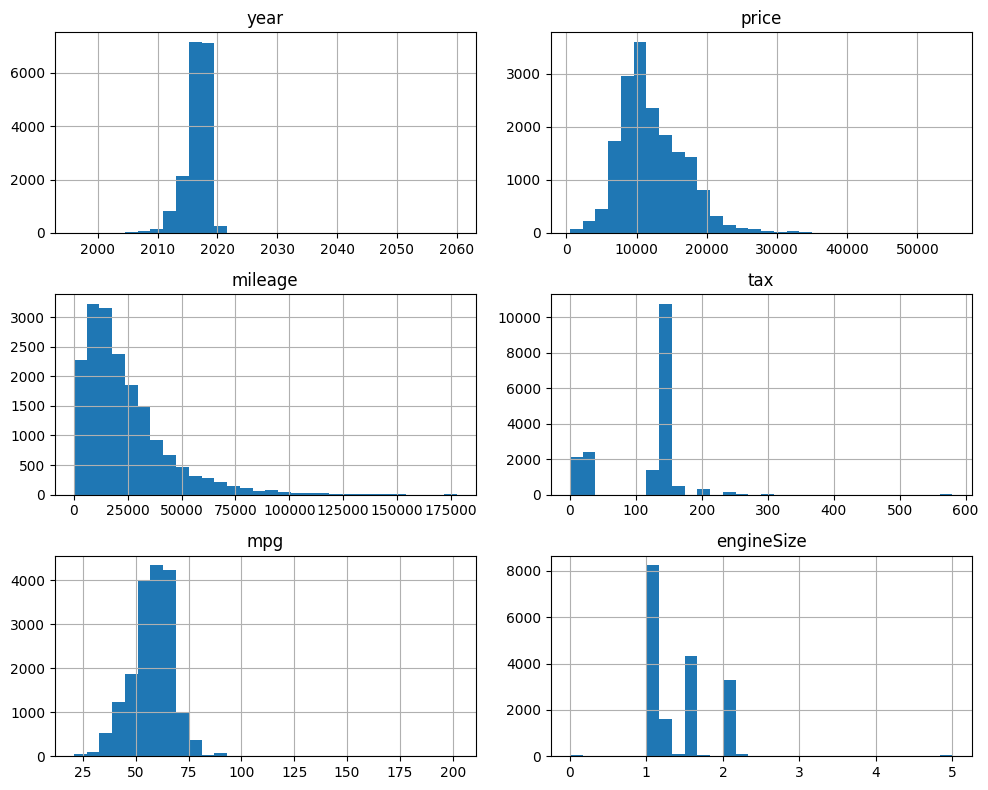

In [65]:
import matplotlib.pyplot as plt

cardf01[numerical_cols].hist(figsize=(10, 8), bins=30)
plt.tight_layout()
plt.show()


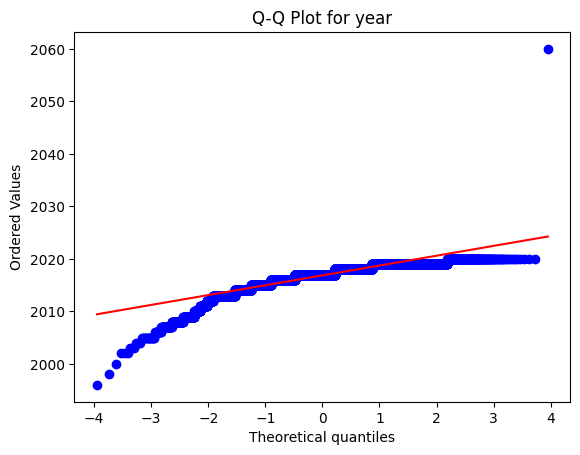

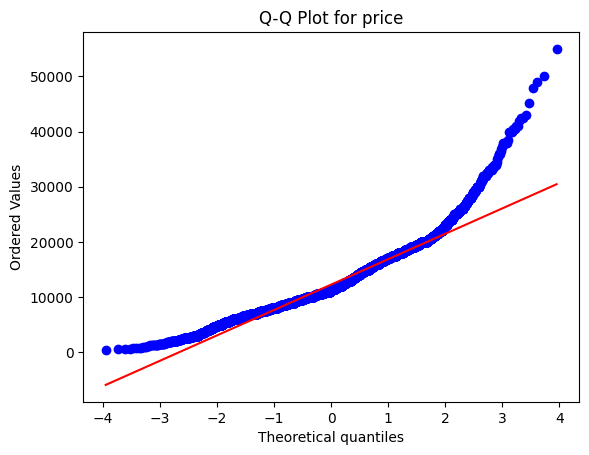

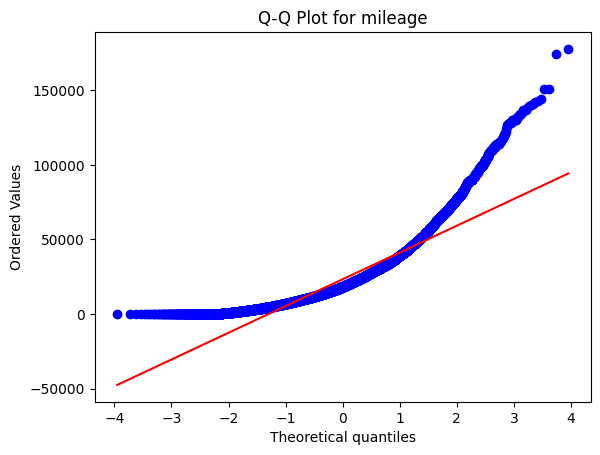

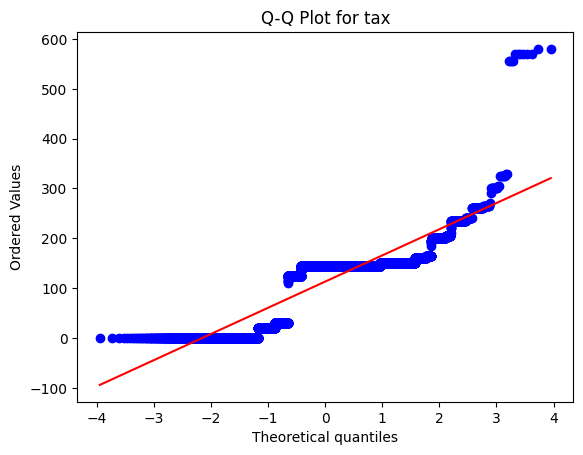

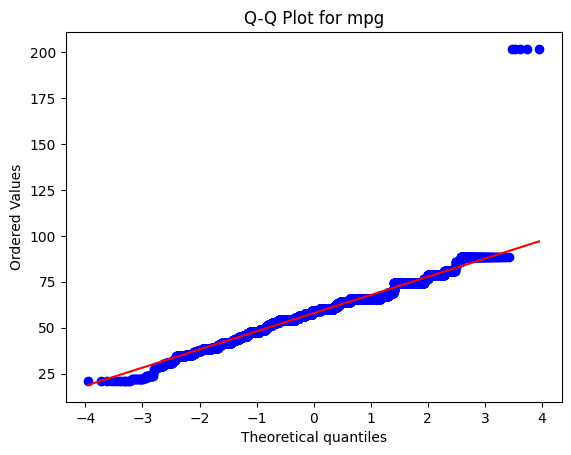

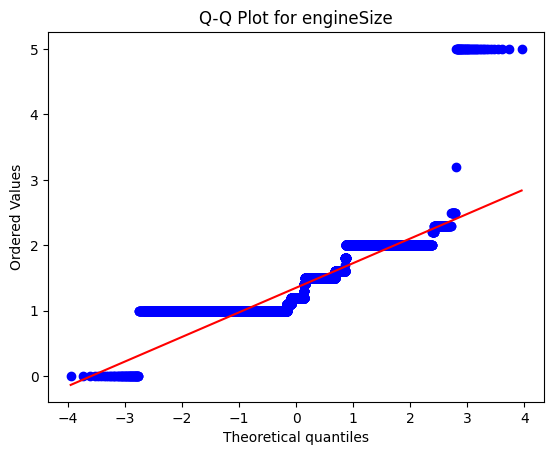

In [66]:
import scipy.stats as stats
# Q-Q plot
for col in numerical_cols:
    stats.probplot(cardf01[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {col}')
    plt.show()


In [67]:
from scipy.stats import shapiro

for col in numerical_cols:
    stat, p = shapiro(cardf01[col])
    print(f'{col}: Statistics={stat}, p-value={p}')


year: Statistics=0.8343413165303853, p-value=1.4489708572237575e-85
price: Statistics=0.9455852473483438, p-value=8.819332497897572e-62
mileage: Statistics=0.8511713759683546, p-value=4.188417919785505e-83
tax: Statistics=0.7157577287063794, p-value=1.5877432539160825e-98
mpg: Statistics=0.9532619480692794, p-value=7.711293545222631e-59
engineSize: Statistics=0.7552259182967211, p-value=7.631374220697355e-95


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 17803.
  res = hypotest_fun_out(*samples, **kwds)


p-value is > 0.05 so it's not gaussian. we need to go with min-max approach

In [68]:

scaled_cardf = cardf01.copy()

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

scaled_cardf[numerical_cols] = min_max_scaler.fit_transform(cardf01[numerical_cols])

print(scaled_cardf.head())


        year     price   mileage   tax       mpg  engineSize  model_ C-MAX  \
9   0.343750  0.174404  0.270993  0.25  0.224309         0.2         False   
10  0.343750  0.203046  0.105841  0.25  0.197238         0.2         False   
11  0.343750  0.238624  0.067911  0.25  0.185083         0.2         False   
12  0.328125  0.192752  0.118085  0.00  0.248066         0.2         False   
13  0.343750  0.321174  0.050669  0.25  0.185083         0.4         False   

    model_ EcoSport  model_ Edge  model_ Escort  ...  model_ Tourneo Connect  \
9             False        False          False  ...                   False   
10            False        False          False  ...                   False   
11             True        False          False  ...                   False   
12            False        False          False  ...                   False   
13            False        False          False  ...                   False   

    model_ Tourneo Custom  model_ Transit Tourneo 

Again before dropping ro removing features using correlation matrix we need to visualize it first

Then we look for features with high correlation (close to 1 or -1)

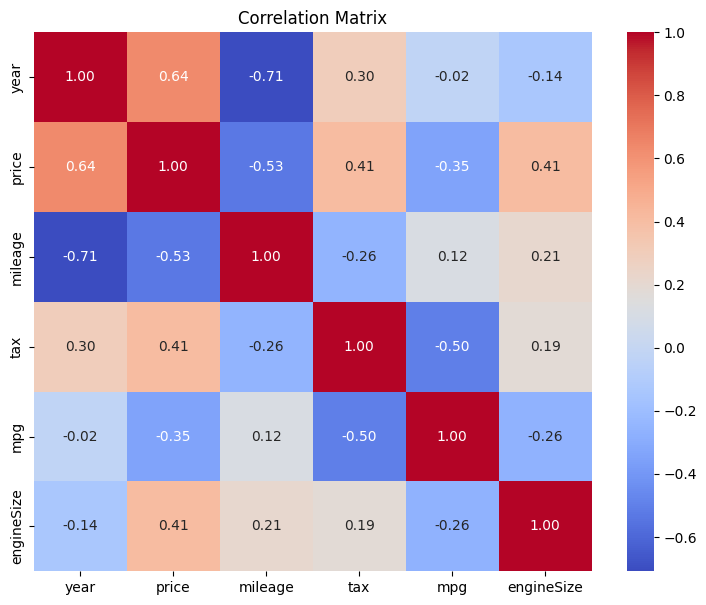

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = scaled_cardf[numerical_cols].corr()

plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [74]:
print(correlation_matrix)


                year     price   mileage       tax       mpg  engineSize
year        1.000000  0.635650 -0.708626  0.297132 -0.021469   -0.137578
price       0.635650  1.000000 -0.530413  0.405988 -0.346036    0.411600
mileage    -0.708626 -0.530413  1.000000 -0.257440  0.117521    0.214637
tax         0.297132  0.405988 -0.257440  1.000000 -0.502310    0.185471
mpg        -0.021469 -0.346036  0.117521 -0.502310  1.000000   -0.262231
engineSize -0.137578  0.411600  0.214637  0.185471 -0.262231    1.000000


In [79]:
# Dropping  'tax' and 'mileage'  for moderate correlations and relevance.  -0.50.
final_cardf = scaled_cardf.drop(columns=['tax', 'mileage'])


In [83]:

new_correlation_matrix = final_cardf.corr()
print("Updated Correlation Matrix:")
print(new_correlation_matrix)





Updated Correlation Matrix:
                                  year     price       mpg  engineSize  \
year                          1.000000  0.635650 -0.021469   -0.137578   
price                         0.635650  1.000000 -0.346036    0.411600   
mpg                          -0.021469 -0.346036  1.000000   -0.262231   
engineSize                   -0.137578  0.411600 -0.262231    1.000000   
model_ C-MAX                 -0.078727 -0.088103  0.027617    0.023153   
model_ EcoSport               0.084482  0.011057 -0.123522   -0.144878   
model_ Edge                   0.024450  0.238008 -0.124439    0.162002   
model_ Escort                -0.076191 -0.014669 -0.017391    0.007785   
model_ Fiesta                -0.021430 -0.333140  0.231366   -0.443294   
model_ Focus                  0.037744  0.112770  0.125777    0.014730   
model_ Fusion                -0.128602 -0.061514 -0.037054    0.009486   
model_ Galaxy                -0.026020  0.133937 -0.051350    0.164793   
model_ Gra

In [84]:
print("Shape of the DataFrame after modifications:", final_cardf.shape)


Shape of the DataFrame after modifications: (17803, 33)
